##  (i) Split the dataset into training and testing sets retaining 80% for training and 20% for testing. Scale the variables (gene expression measurements) to have mean zero and standard deviation one. Explain why the data should be scaled.

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [86]:
df = pd.read_csv('gene_file.csv')  # Replace with your file path

# View and understand dataset
# Inspect the first few rows of the dataset
print(df.head())

# Check basic information about the dataset
print(df.info())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

   samples        type  1007_s_at   1053_at     117_at    121_at  1255_g_at  \
0      834  ependymoma  12.498150  7.604868   6.880934  9.027128   4.176175   
1      835  ependymoma  13.067436  7.998090   7.209076  9.723322   4.826126   
2      836  ependymoma  13.068179  8.573674   8.647684  9.613002   4.396581   
3      837  ependymoma  12.456040  9.098977   6.628784  8.517677   4.154847   
4      838  ependymoma  12.699958  8.800721  11.556188  9.166309   4.165891   

    1294_at   1316_at   1320_at  ...  AFFX-r2-Ec-bioD-3_at  \
0  7.224920  6.085942  6.835999  ...              9.979005   
1  7.539381  6.250962  8.012549  ...             11.924749   
2  7.813101  6.007746  7.178156  ...             12.154405   
3  8.361843  6.596064  6.347285  ...             11.969072   
4  7.923826  6.212754  6.866387  ...             11.411701   

   AFFX-r2-Ec-bioD-5_at  AFFX-r2-P1-cre-3_at  AFFX-r2-P1-cre-5_at  \
0              9.926470            12.719785            12.777792   
1             

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Create Training and Testing Datasets

In [87]:
# Separate features and target
X = df.drop(columns=['samples', 'type'])  # Features (gene expression data)
Y = df['type']  # Target (cancer type)

Samples is an ID and Type is the target variable - what we want to predict. So we can remove them from X, which represents the gene data.

In [88]:
# Split the data (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Scale the variables

In [89]:
# Scale the data
scaler = StandardScaler()

X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [19]:
# Checking whether it has worked correctly:
print("Mean of scaled data (first 5 features):", X_scaled_train.mean(axis=0)[:5])
print("Std dev of scaled data (first 5 features):", X_scaled_train.std(axis=0)[:5])
print("Test Data - Mean (first 5 features):", X_scaled_test.mean(axis=0)[:5])

Mean of scaled data (first 5 features): [-2.08674177e-15 -1.14006773e-15  9.26379642e-16  8.38039315e-16
  2.14881876e-16]
Std dev of scaled data (first 5 features): [1. 1. 1. 1. 1.]
Test Data - Mean (first 5 features): [-0.10687846  0.04214867 -0.29429173 -0.45415985 -0.17689051]


StandardScaler is used here as it scales the data to have a mean of 0 and S.D of 1.

The data needs to be scaled for a few reasons.
1. Reduces the impact of outliars and skewness of data. Making it more interpretable. The gene data has a range from around 3 to 15.
2. PCA is more effective when the data has been scaled as patterns are clearer
3. The datasets high dimentionality is reduced by scaling the data. Making it less complex.
4. More effiecient processing

##  (ii) Perform dimensionality reduction using PCA on the scaled data set and choose the optimal number of retained principal components. Explain your choice.

In [ ]:
#Perform PCA on the Training data set

In [90]:
from sklearn import decomposition
pca = decomposition.PCA()
X_scaled_train_pca = pca.fit(X_scaled_train)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components to retain 90% variance
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Number of components for 90% variance: {n_components_90}")

Number of components for 90% variance: 55


The optimal amount of retained principle components should explain 90% of the variation of the data. By working out the cumulative variance, we can see that 55 compenents explain 90%. To confirm if this dimensionality reduction is accurate, I will plot the orginal compenents against the reduced ones.

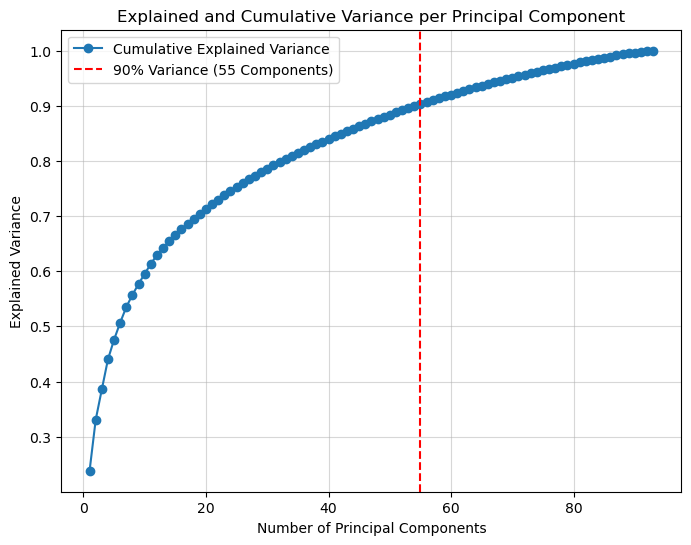

In [91]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Generate component indices
components = np.arange(1, len(cumulative_variance) + 1)

# Determine the number of components for 90% variance
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1

# Plot explained variance ratio and cumulative variance
plt.figure(figsize=(8, 6))

# Cumulative explained variance
plt.plot(components, cumulative_variance, marker='o', linestyle='-', label="Cumulative Explained Variance")

# Highlight the 90% variance threshold
plt.axvline(x=n_components_90, color='r', linestyle='--', label=f"90% Variance ({n_components_90} Components)")

# Labels and Title
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance")
plt.title("Explained and Cumulative Variance per Principal Component")
plt.legend()
plt.grid(alpha=0.5)
plt.show()

## (iii) Visualise the results of dimensionality reduction and comment on your findings. Consider using scatter plots or other relevant visualisations to showcase the reduced dimensionality.

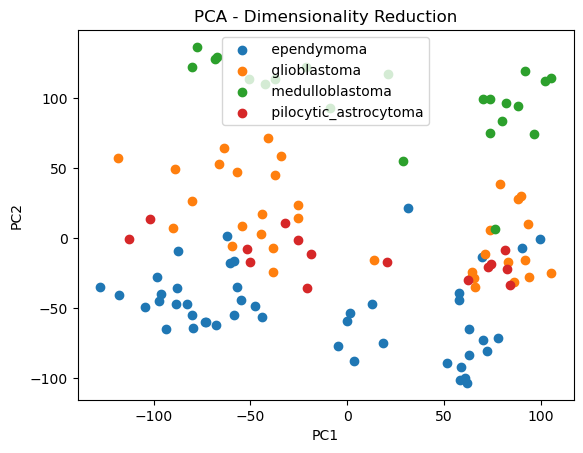

In [92]:
# Creating new reduced dataset
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

for label in df['type'].unique():
    mask = df['type'] == label
    
    plt.scatter(X_reduced[mask, 0], X_reduced[mask, 1], label=f' {label}')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - Dimensionality Reduction')

plt.legend()
plt.show()


The 2-dimensional PCA has started separating the different types into separate clusters. Ependymoma in particular has a more clear clustering as its distinctly separated from the other types. Whereas, the other three types are still fairly overlapped, indicating that further PCA needs to be conducted so we can see more distinct clusters.

##  (iv) Construct a logistic regression using the PCA-transformed dataset to accurately predict the cancer type. Choose a performance metric to evaluate the effectiveness of your logistic regression model.
 

In [2]:
import numpy as np
from sklearn import decomposition
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Applying PCA to scaled test data
pca_optimal = decomposition.PCA(n_components= 55)
X_train_pca = pca_optimal.fit_transform(X_scaled_train)
X_test_pca = pca_optimal.transform(X_scaled_test)

# Training Logisitic Regression Model
logreg = LogisticRegression(max_iter = 1000, random_state = 42)
logreg.fit(X_train_pca, Y_train)

# Making prediction using testing data
y_prediction = logreg.predict(X_test_pca)


# Evaluating Model using the Accuracy test
accuracy = accuracy_score(Y_test, y_prediction)
print(f"Accuracy: {accuracy:.2f}")


NameError: name 'X_scaled_train' is not defined

In [94]:
np.mean(Y_test == y_prediction)

0.875

The accuraxy performance metricfrom sklearn.metrics measures the accuracy of the logistic regression model by working out the number of correct predictions divided by the total number of predictions.

To get this we use the predicted outcomes (y_prediction) and compare them to the real data (Y_test).

With a score of 0.88, 88% of predictions made were correct. Indicating that this model is fairly accurate